# Virus Spread

We simulate the spread of a virus on a random network

In [1]:
import numpy.random as random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from nxviz import CircosPlot, ArcPlot
import os
os.chdir(PATH)

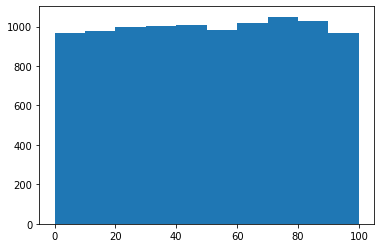

In [2]:
randoms = []
for x in range(10000):
    randoms.append(random.rand()*100)
plt.hist(randoms)
plt.show()

We can see that random module generate random numbers (i.i.d.), which can be used in terms of probability for bernoulli trials.

<Figure size 432x288 with 0 Axes>

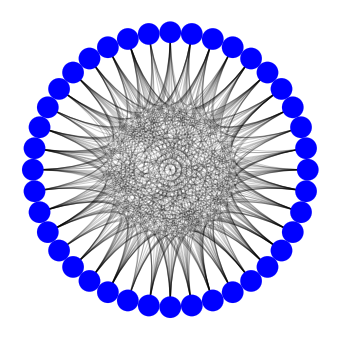

In [3]:
plt.clf()
n = 40
p = 0.5
G = nx.gnp_random_graph(n, p, seed=None, directed=False)
c = CircosPlot(G)
c.draw()
plt.show()

Here we just check our random graph

In [4]:
list(nx.isolates(G)) # check if there are any isolated nodes

[]

now we are going to initialize random weights for each edge
Some people have more frequent contacts than others, let show it in weights which will be also the probability of propogating virus

In [5]:
for (node1,node2) in G.edges():
    G.remove_edge(node1, node2)
    weight_n1n2 = random.rand()
    G.add_edge(node1, node2, weight = weight_n1n2)
    G.edges[node1, node2]['weight'] = weight_n1n2

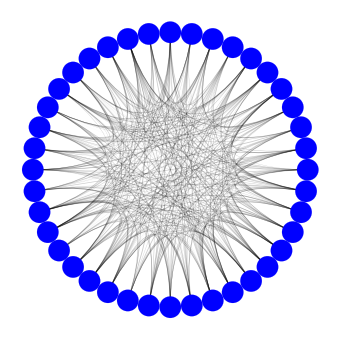

In [6]:
c = CircosPlot(G, edge_width='weight')
c.draw()
plt.show()# show weighted network

In [7]:
# initialize the status
for n in G.nodes():
    G.node[n]['healthy'] = 1
    G.node[n]['infected'] = 0
    G.node[n]['sick'] = 0
    G.node[n]['dead'] = 0
    G.node[n]['recovered'] = 0
    G.node[n]['start'] = None
Date = 0

Virus will have 3 parameters 
incubation (when person communicates to others and spread the virus), 
recovery (how many days does it take to recover after getting sick)
mortality (every day of being sick a person can die with the probability of mortality)

In [8]:
virus = {'incubation':7,'recovery':2,'mortality':.01} 
def virus_spread(G, virus, nodes, n_days):
    newly_infected = []
    current_date = 0
    nodes_inf = nodes
    for nodes_i in nodes:
        G.node[nodes_i]['healthy'] = 0
        G.node[nodes_i]['infected'] = 1
        G.node[nodes_i]['start'] = 0
    while current_date <= n_days:
        current_date += 1
        nodes_inf = nodes_inf+newly_infected
        print("current day:",current_date)
        for n in list(nodes_inf):   
            if G.node[n]['infected'] == 1:
                for neighbor in nx.neighbors(G,n):
                    if G.node[neighbor]['sick'] !=1 and G.node[neighbor]['dead']!=1 and G.node[neighbor]['infected']!=1:
                        if G.node[neighbor]['recovered'] == 1:
                            if random.rand()<G.edges[n, neighbor]['weight']/10:
                                G.node[neighbor]['healthy'] = 0
                                G.node[neighbor]['infected'] = 1
                                G.node[neighbor]['start'] = current_date
                                newly_infected.append(neighbor)
                            else:
                                pass
                        else:
                            if random.rand()<G.edges[n, neighbor]['weight']:
                                G.node[neighbor]['healthy'] = 0
                                G.node[neighbor]['infected'] = 1
                                G.node[neighbor]['start'] = current_date
                                newly_infected.append(neighbor)
                            else:
                                pass
        for n in list(nodes_inf):
            if G.node[n]['infected'] == 1 and abs(current_date-G.node[n]['start'])>virus['incubation']:
                G.node[n]['recovered'] = 0
                G.node[n]['healthy'] = 0
                G.node[n]['infected'] = 0
                G.node[n]['sick'] = 1
                G.node[n]['dead'] = 0
            elif G.node[n]['sick'] == 1 and current_date-G.node[n]['start']>virus['incubation']+virus['recovery']:
                G.node[n]['recovered'] =1
                G.node[n]['healthy'] = 0
                G.node[n]['infected'] = 0
                G.node[n]['sick'] = 0
                G.node[n]['dead'] = 0
            else:
                pass
        for n in list(nodes_inf):
            if G.node[n]['sick'] == 1:
                if random.rand()<virus['mortality']:
                    G.node[n]['healthy'] = 0
                    G.node[n]['infected'] = 0
                    G.node[n]['sick'] = 0
                    G.node[n]['dead'] = 1
                    G.node[n]['recovered'] = 0

    return G

In [9]:
virus_spread(G, virus, [29,30], 20)

current day: 1
current day: 2
current day: 3
current day: 4
current day: 5
current day: 6
current day: 7
current day: 8
current day: 9
current day: 10
current day: 11
current day: 12
current day: 13
current day: 14
current day: 15
current day: 16
current day: 17
current day: 18
current day: 19
current day: 20
current day: 21


In [10]:
for n in list(G.nodes):
    if G.node[n]['healthy'] == 1 or G.node[n]['recovered'] == 1:
        G.node[n]['status'] = 'healthy'
    elif G.node[n]['dead'] == 1:
        G.node[n]['status'] = 'dead'
    elif G.node[n]['infected'] == 1:
        G.node[n]['status'] = 'infected'
    elif G.node[n]['sick'] == 1:
        G.node[n]['status'] = 'sick'
    else:
        G.node[n]['status'] = 'no data'

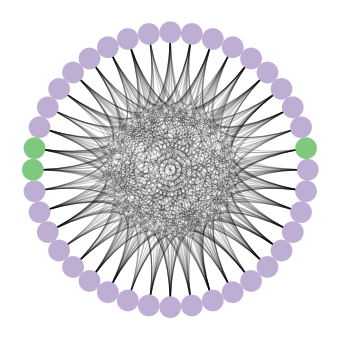

In [11]:
c = CircosPlot(G, node_color = 'status', group_legend = True)
c.draw()
plt.show()

In [12]:
for n in G.nodes():
    G.node[n]['healthy'] = 1
    G.node[n]['infected'] = 0
    G.node[n]['sick'] = 0
    G.node[n]['dead'] = 0
    G.node[n]['recovered'] = 0
    G.node[n]['start'] = None

Lets see how our graph changes over time with nxviz library 

In [13]:
def virus_spread_viz(G, virus, nodes, n_days):
    newly_infected = []
    current_date = 0
    nodes_inf = nodes
    for nodes_i in nodes:
        G.node[nodes_i]['healthy'] = 0
        G.node[nodes_i]['infected'] = 1
        G.node[nodes_i]['start'] = 0
    while current_date <= n_days:
        for n in list(G.nodes):
            if G.node[n]['healthy'] == 1 or G.node[n]['recovered'] == 1:
                G.node[n]['status'] = 'healthy'
            elif G.node[n]['dead'] == 1:
                G.node[n]['status'] = 'dead'
            elif G.node[n]['infected'] == 1:
                G.node[n]['status'] = 'infected'
            elif G.node[n]['sick'] == 1:
                G.node[n]['status'] = 'sick'
            else:
                G.node[n]['status'] = 'no data'
        try:
            c = CircosPlot(G, node_color = 'status') ### nxviz cannot visualise node color 
                                                     ### if all nodes belongs to the same group
        except AssertionError:
            c = CircosPlot(G)
        c.draw()
        plt.show()
        current_date += 1
        nodes_inf = nodes_inf+newly_infected
        print("current day:",current_date)
        for n in list(nodes_inf):   
            if G.node[n]['infected'] == 1:
                for neighbor in nx.neighbors(G,n):
                    if G.node[neighbor]['sick'] !=1 and G.node[neighbor]['dead']!=1 and G.node[neighbor]['infected']!=1:
                        if G.node[neighbor]['recovered'] == 1:
                            if random.rand()<G.edges[n, neighbor]['weight']/10: #probs of getting infected with developped
                                                                                ### immunity decreased by 10 times
                                G.node[neighbor]['healthy'] = 0
                                G.node[neighbor]['infected'] = 1
                                G.node[neighbor]['start'] = current_date
                                newly_infected.append(neighbor)
                            else:
                                pass
                        else:
                            if random.rand()<G.edges[n, neighbor]['weight']:
                                G.node[neighbor]['healthy'] = 0
                                G.node[neighbor]['infected'] = 1
                                G.node[neighbor]['start'] = current_date
                                newly_infected.append(neighbor)
                            else:
                                pass
        for n in list(nodes_inf):
            if G.node[n]['infected'] == 1 and abs(current_date-G.node[n]['start'])>virus['incubation']:
                G.node[n]['recovered'] = 0
                G.node[n]['healthy'] = 0
                G.node[n]['infected'] = 0
                G.node[n]['sick'] = 1
                G.node[n]['dead'] = 0
            elif G.node[n]['sick'] == 1 and current_date-G.node[n]['start']>virus['incubation']+virus['recovery']:
                G.node[n]['recovered'] =1
                G.node[n]['healthy'] = 0
                G.node[n]['infected'] = 0
                G.node[n]['sick'] = 0
                G.node[n]['dead'] = 0
            else:
                pass
        for n in list(nodes_inf):
            if G.node[n]['sick'] == 1:
                if random.rand()<virus['mortality']:
                    G.node[n]['healthy'] = 0
                    G.node[n]['infected'] = 0
                    G.node[n]['sick'] = 0
                    G.node[n]['dead'] = 1
                    G.node[n]['recovered'] = 0

    return G

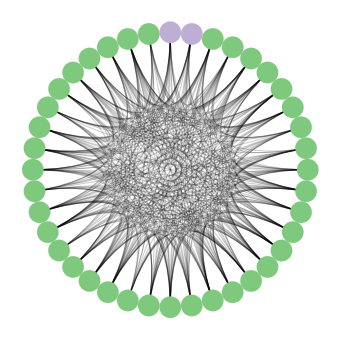

current day: 1


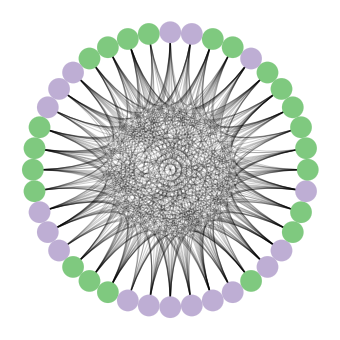

current day: 2


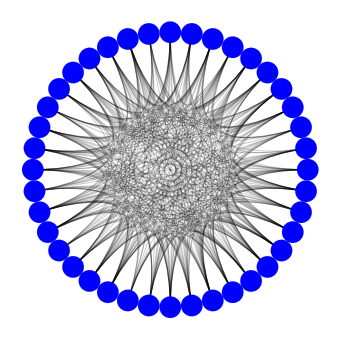

current day: 3


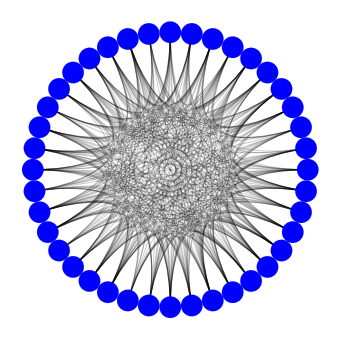

current day: 4


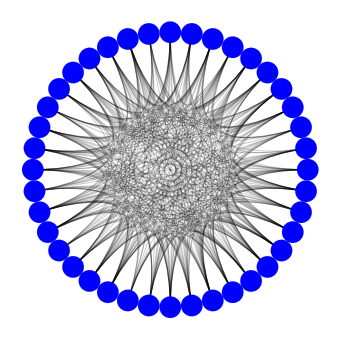

current day: 5


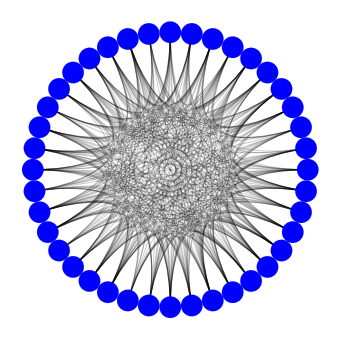

current day: 6


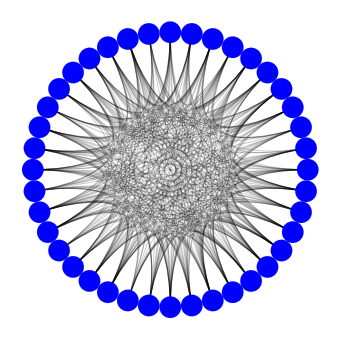

current day: 7


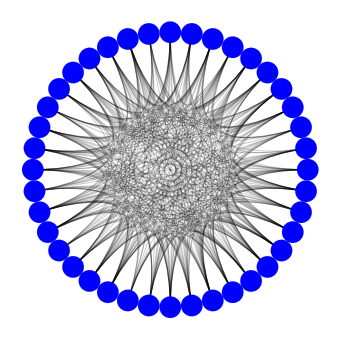

current day: 8


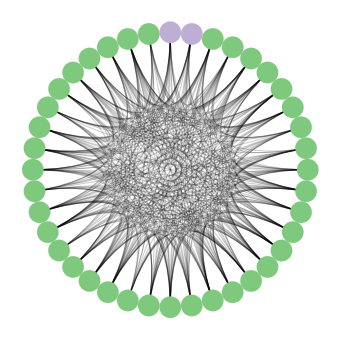

current day: 9


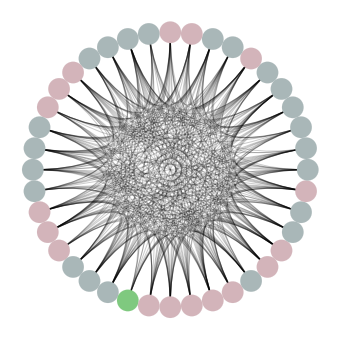

current day: 10


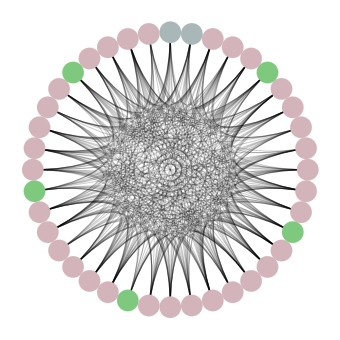

current day: 11


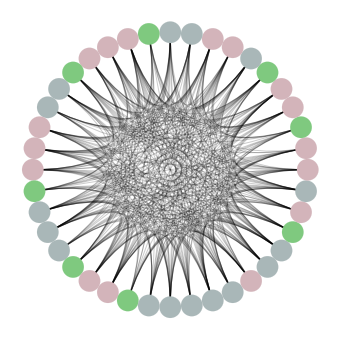

current day: 12


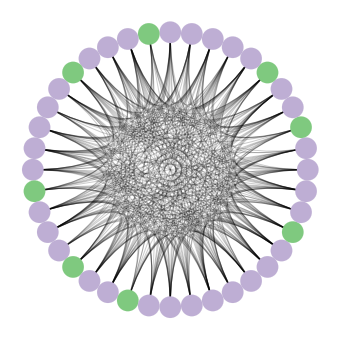

current day: 13


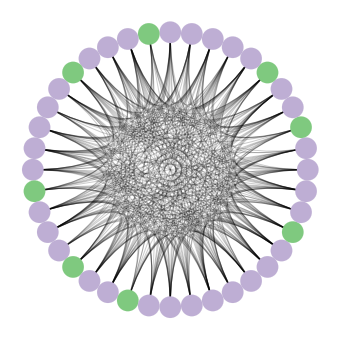

current day: 14


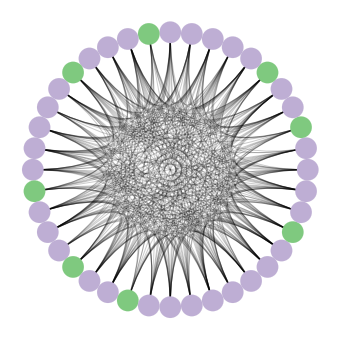

current day: 15


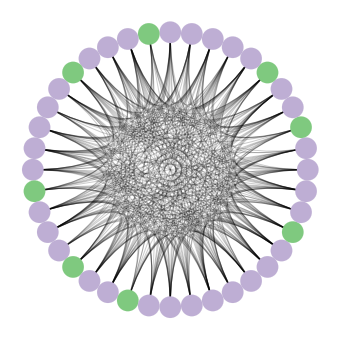

current day: 16


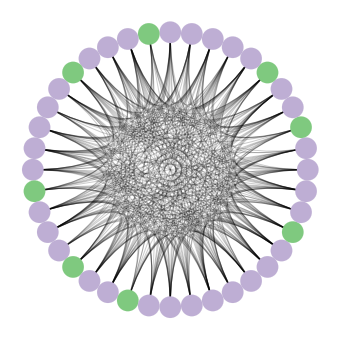

current day: 17


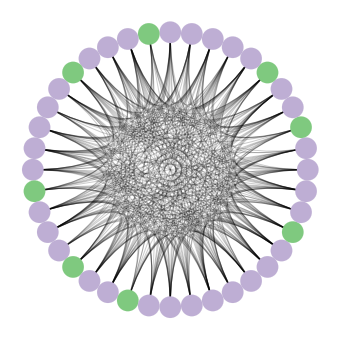

current day: 18


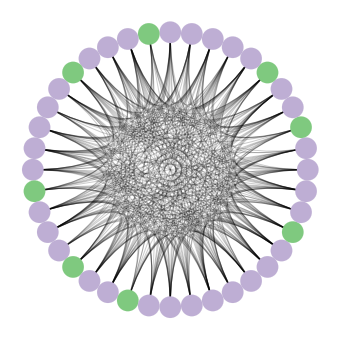

current day: 19


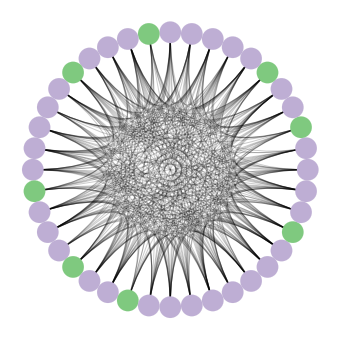

current day: 20


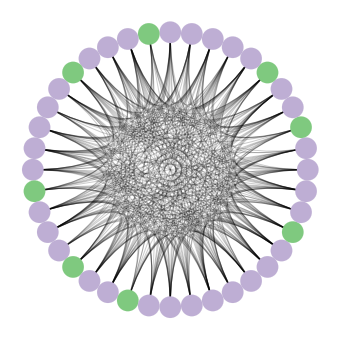

current day: 21


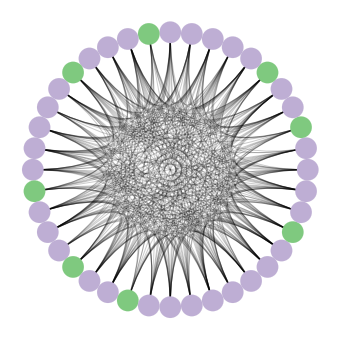

current day: 22


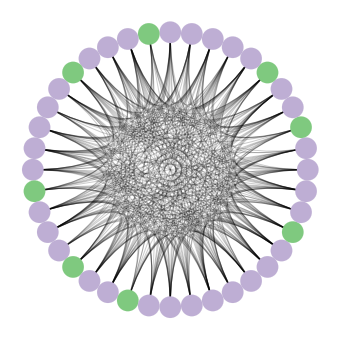

current day: 23


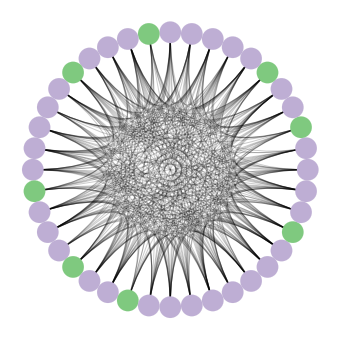

current day: 24


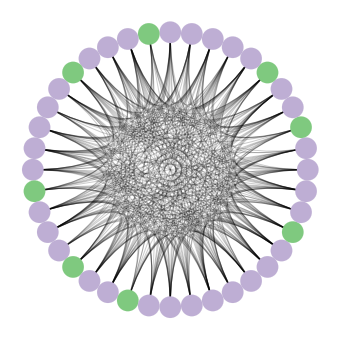

current day: 25


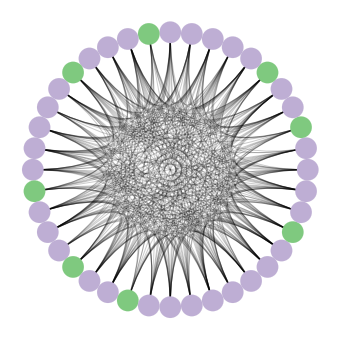

current day: 26


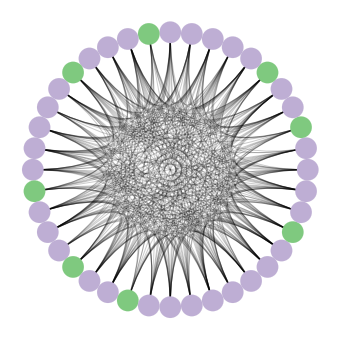

current day: 27


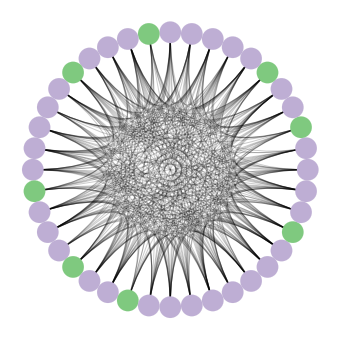

current day: 28


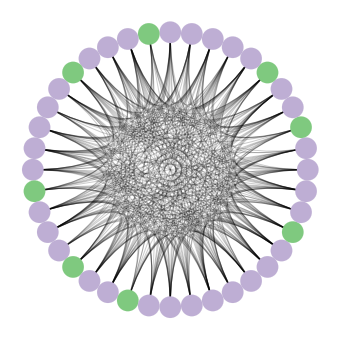

current day: 29


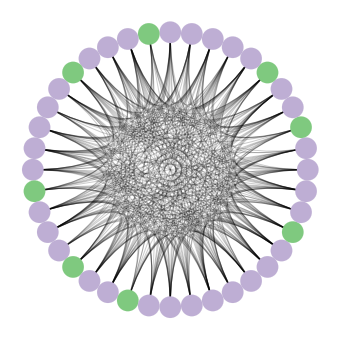

current day: 30


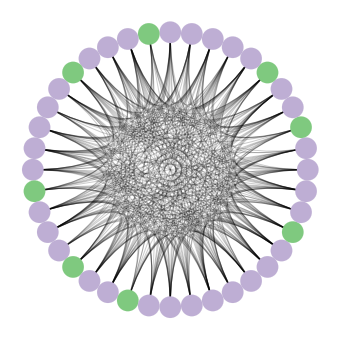

current day: 31


In [14]:
virus = {'incubation':7,'recovery':2,'mortality':.01}
for n in G.nodes():
    G.node[n]['healthy'] = 1
    G.node[n]['infected'] = 0
    G.node[n]['sick'] = 0
    G.node[n]['dead'] = 0
    G.node[n]['recovered'] = 0
    G.node[n]['start'] = None
    
Date = 0
virus_spread_viz(G, virus, [29,30], 30)

We see that our network stabilized after 12 days, most of nodes have recovered and some nodes are dead 
lets see the nodes status to verify it.

In [15]:
G.nodes(data = True)

NodeDataView({0: {'healthy': 0, 'infected': 0, 'sick': 0, 'dead': 0, 'recovered': 1, 'start': 2, 'status': 'healthy'}, 1: {'healthy': 0, 'infected': 0, 'sick': 0, 'dead': 1, 'recovered': 0, 'start': 2, 'status': 'dead'}, 2: {'healthy': 0, 'infected': 0, 'sick': 0, 'dead': 0, 'recovered': 1, 'start': 1, 'status': 'healthy'}, 3: {'healthy': 0, 'infected': 0, 'sick': 0, 'dead': 0, 'recovered': 1, 'start': 1, 'status': 'healthy'}, 4: {'healthy': 0, 'infected': 0, 'sick': 0, 'dead': 0, 'recovered': 1, 'start': 1, 'status': 'healthy'}, 5: {'healthy': 0, 'infected': 0, 'sick': 0, 'dead': 1, 'recovered': 0, 'start': 2, 'status': 'dead'}, 6: {'healthy': 0, 'infected': 0, 'sick': 0, 'dead': 0, 'recovered': 1, 'start': 2, 'status': 'healthy'}, 7: {'healthy': 0, 'infected': 0, 'sick': 0, 'dead': 0, 'recovered': 1, 'start': 2, 'status': 'healthy'}, 8: {'healthy': 0, 'infected': 0, 'sick': 0, 'dead': 1, 'recovered': 0, 'start': 1, 'status': 'dead'}, 9: {'healthy': 0, 'infected': 0, 'sick': 0, 'dead'

Indeed most of nodes are healthy, menwhile some of them (node 35, for example) are dead 